In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config import api_key


Bad key text.latex.preview in file C:\Users\Dan\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\Dan\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\Dan\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the de

ModuleNotFoundError: No module named 'config'

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [3]:
response = requests.get(query_url + "Accra").json()

In [4]:
response

{'cod': 401,
 'message': 'Invalid API key. Please see https://openweathermap.org/faq#error401 for more info.'}

In [5]:
cities = ["Seville", "London", "Oslo", "Vienna"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

KeyError: 'coord'

In [ ]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

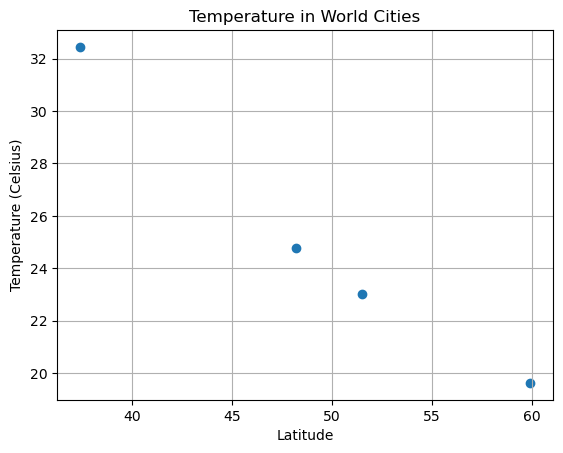

In [17]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

<AxesSubplot:xlabel='lat', ylabel='temp'>

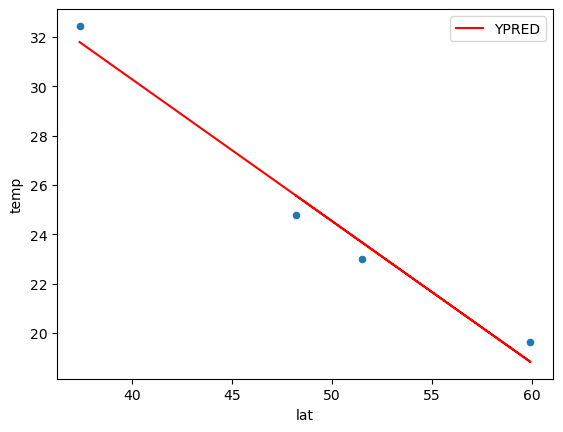

In [18]:
# Add the linear regression line to plot
from sklearn.linear_model import LinearRegression

#Set your x and y and reshape to np array
x = weather_data['lat'].values.reshape(-1, 1) 
y = weather_data['temp'].values.reshape(-1, 1)

# Fit your Model
linear_regressor = LinearRegression().fit(x, y)

# Generate predictions and store in df
weather_data['YPRED'] = linear_regressor.predict(x)

# Plot the data
ax = weather_data.plot.scatter(x='lat', y='temp')
weather_data.plot(x='lat', y='YPRED', color='red', ax=ax)

In [19]:
# Get the coefficients
m = linear_regressor.coef_[0]
b = linear_regressor.intercept_

# Print the equation
print(f"The linear equation is: y = {round(m[0], 2)}x + {round(b[0], 2)}")

The linear equation is: y = -0.58x + 53.3


In [ ]:
# Calculate the temperature for NY at 40.71 degrees
ny_lat = 40.71
ny_predicted_temp = round(m[0] * ny_lat + b[0],2)
                                
print(f"The Predicted temperature for NY will be {ny_predicted_temp}.")